In [ ]:
#MACHINE LEARNING PROJECT

# ML Project version 1
# So the project idea is simply identifocation of handwritten numbers.

# Thought I would write any necessary notes i come up with here:
# 1) firstly, you need to change this parameter: input_path = 'C:\\Users\\chemj\\OneDrive\\Desktop\\EEE4114F\\Machine learning practicals\\Project\\archive' to wherever you saved the data set. This parameter is found in the second cell after this cell.

# 2) Secondly, you dumb bitch

# 3) under the neural network archtecture section, ive created a architecture exactly like from his example lectures. We can definetly change the architecture. Just using his for now to get things started

# 4) last cell inst working. My brain isnt working at the moment so couldnt figure it out.


# ML Project version 2
# Notes on the version completed on 13th May 2023:
#  1)This version shouldnt have any errors when running.
#  2)It contains all the graphs and code in jaryds videos with no addition
#  3)I didnt run the actual training loop finished cause it was taking too long. thats why the blue line on the loss 
#    and accuracy graph is wonky
#  4) Dumb bitch say "what?" (i heard you say what)

# for next update i wanna try and use different loss functions and optimization functions. we could also try changing 
# the value of the hidden layer from "20" to something else
# We should also try putting in our own handwriting or something and testing the trained model


## Uploading and reading the data set (MNIST)

In [10]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        


1


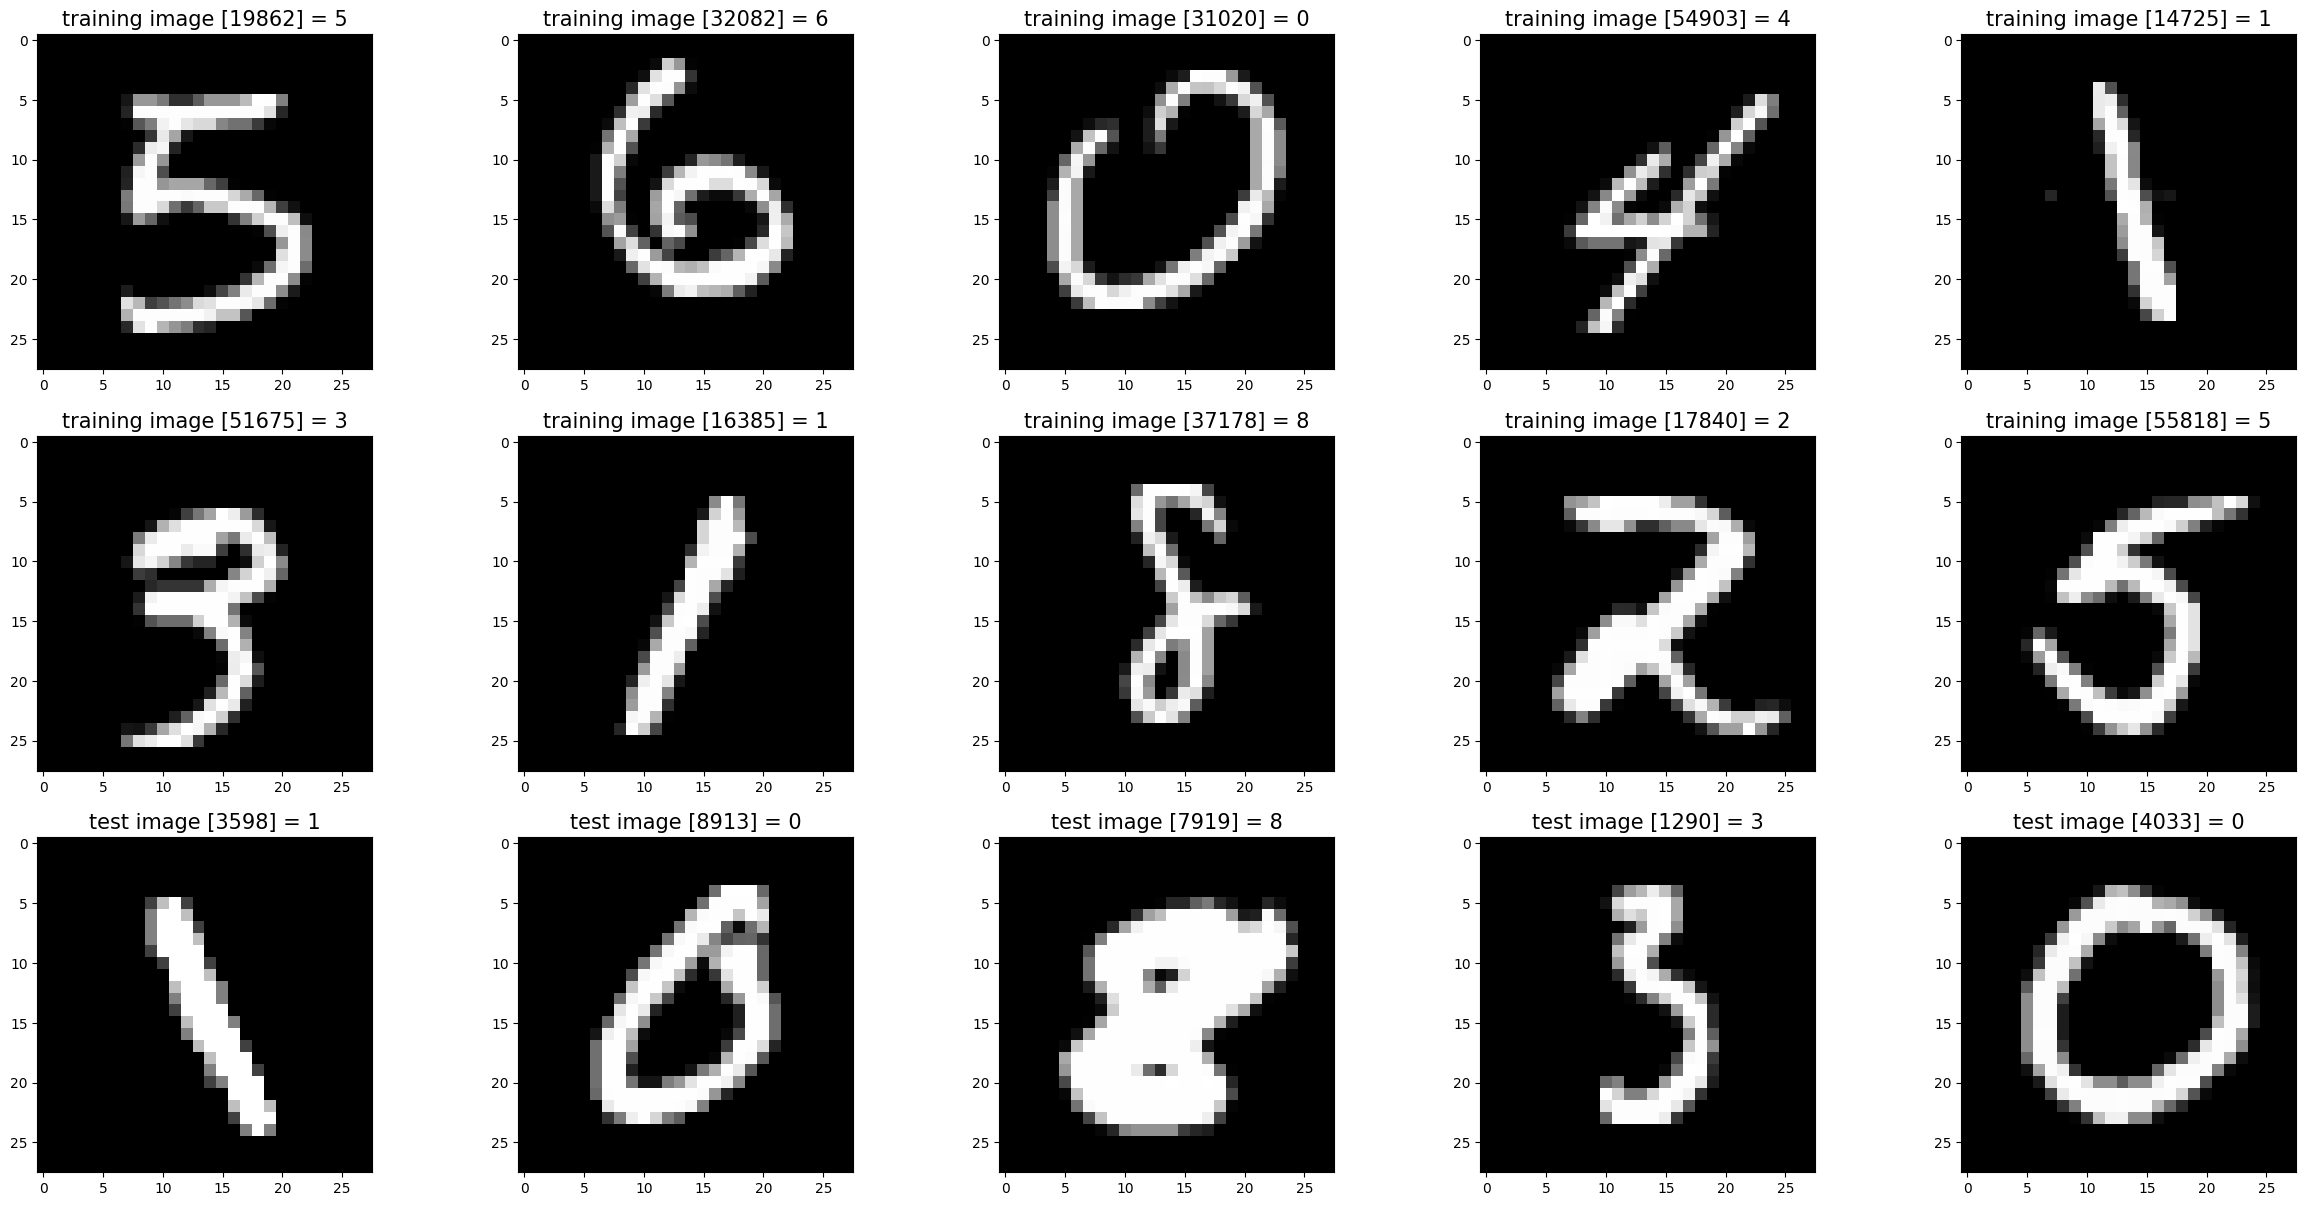

In [11]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets

#CHANGE THIS PARAMETER!!
#input_path = 'C:\\Users\\chemj\\OneDrive\\Desktop\\EEE4114F\\Machine learning practicals\\Project\\archive'
input_path = 'C:\\Users\\kauth\\OneDrive\\Desktop\\uct jazz\\DSP\\Project\\archive'

training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)
print(y_train[3])

In [12]:
#Creation of validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)




# Libararies used


In [8]:
from pathlib import Path
import random
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import SubsetRandomSampler
from PIL import Image

# Custom Dataset

In [9]:
class MNIST(Dataset):
    def __init__(self, data, targets,transform=None):
        self.data = data
        self.transform = transform
        self.enc = LabelEncoder()
        targets = self.enc.fit_transform(targets.reshape(-1,))
        self.targets = torch.LongTensor(targets)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index - int(index.item())
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index])
            x = self.transform(x)
        return x,y

    def __len__(self):
       return len(self.data)

# Data Scaling

In [13]:
scaler = MinMaxScaler()
x_train_shape = x_train.shape
x_val_shape = x_val.shape
x_test_shape = x_test.shape

#fit scaler on training data and transform it as well
x_train = scaler.fit_transform(x_train.reshape(-1,1))
x_train = x_train.reshape(x_train_shape)

#transform evaluation sets (not fit)
x_val = scaler.transform(x_val.reshape(-1,1))
x_val = x_val.reshape(x_val_shape)
x_test = scaler.transform(x_test.reshape(-1,1))
x_test = x_test.reshape(x_test_shape)







# Dataloaders

In [14]:
#define transform
transform = transforms.Compose(
[
    transforms.ToTensor()
]
)

#defining datasets
train_dataset = MNIST(x_train, y_train, transform = transform)
val_dataset = MNIST(x_val, y_val, transform = transform)
test_dataset = MNIST(x_test, y_test, transform = transform)

BATCH_SIZE = 30 #no idea what size to make the batches
#define dataloaders
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE)
val_loader = DataLoader(val_dataset, batch_size = len(val_dataset))
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset))






# Neural Network Archtecture

In [42]:
#REDO THIS MATH!!

class Net(nn.Module):
    def __init__(self):
        #MNIST consists of 28x28 pixle images (greyscale)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        #ouput = 6 maybe size 24?
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #ouptut = 16
        #6 channels applying 16 5x5 kernels
        
        #256 is ouput from 16*4*4 which is 16 outputs of 4x4 size
        self.fc1 = nn.Linear(256, 30)
        self.fc2  = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)
        #10 is the target size (0 to 9 numbers)
        
    def forward(self, x):       
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



#error in  outputs = model(inputs) for x = F.relu(self.fc1(x)) ??
#check self.fc1 = nn.Linear(16 * 10 * 10, 120) - need to check sizes of matrices (x.shape)





In [43]:
# create model from architecture
model = Net()

print(model)



Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)


# Loss Function

In [44]:
#can change
criterion = nn.CrossEntropyLoss()





# Optimizer

In [45]:
#can change

optimizer =  optim.Adam(model.parameters(), lr = 0.001)




In [46]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()
            return running_loss/len(loader), correct/total
            
    
    
    
    

# Training Loop


In [ ]:
history = {
            
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': []
        }
running_loss = 0
total = 0
        
MAX_EPOCHS =80
    
for epoch in range(MAX_EPOCHS):
            print("Starting epoch: {}".format(epoch+1))
            for i, data in enumerate (train_loader, 0):
                model.train()
                inputs, labels = data
                
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss ++ loss.item()
                
                if i % 10 == 9:
                    mean_loss = running_loss/10
                    _, predicted = torch.max(outputs.data, 1)
                    correct = (predicted == labels).sum().item()
                    train_acc = correct/ labels.size(0)
                        
                    history['train_loss'].append(mean_loss)
                    history['train_acc'].append(train_acc)
                    
                    print("# mini_batch {}\ntrainloss: {} training accuracy: {}".format(i+1, mean_loss, train_acc))
                    running_loss = 0.0
                    
                    mean_loss, val_acc = evaluate(model, val_loader)
                    history['val_loss'].append(mean_loss)
                    history['val_acc'].append(val_acc)
                    print("validation loss: {} training accuracy: {}".format( mean_loss, val_acc))
                
print('Finished Training')
    

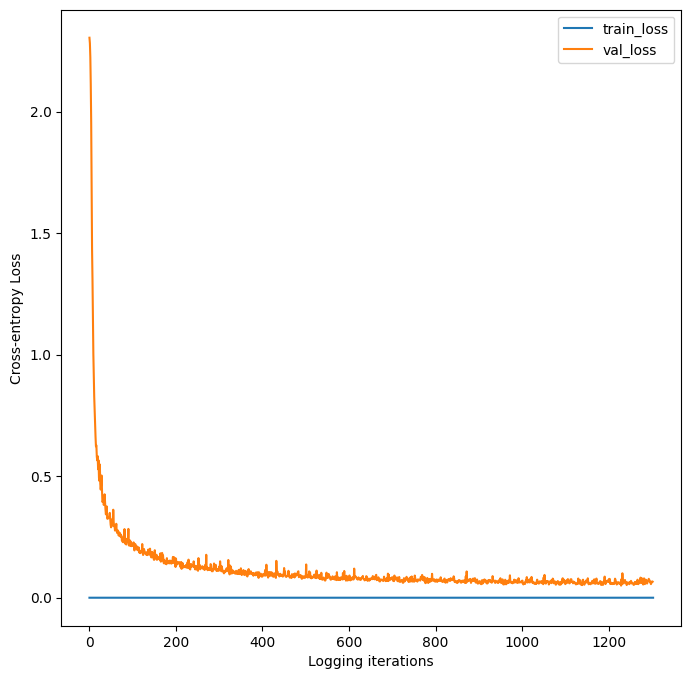

In [49]:
# Plotting the loss curves

fig = plt.figure(figsize=(8,8))
plt.plot(history['train_loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel("Logging iterations")
plt.ylabel("Cross-entropy Loss")
plt.legend()
plt.show()

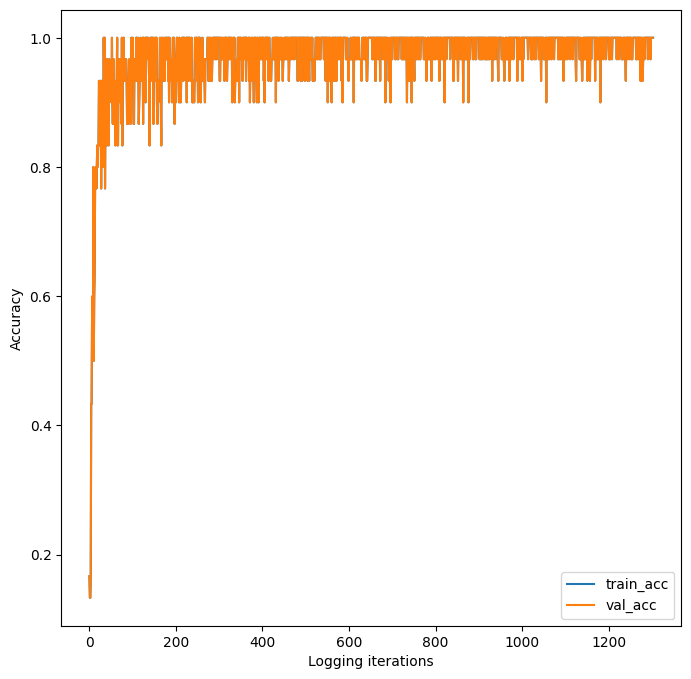

In [50]:
#Plotting the validation loss

fig = plt.figure(figsize=(8,8))
plt.plot(history['train_acc'], label='train_acc')
plt.plot(history['val_acc'], label='val_acc')
plt.xlabel("Logging iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
_, test_acc = evaluate(model, test_loader)
print("Test accuracy = {}".format(test_acc))

Test accuracy = 0.983


In [53]:
#Confusion matrix

from sklearn.metrics import confusion_matrix

it = iter(test_loader)
x, y = next(it)

outputs = model(x)
_, y_pred = torch.max(outputs, 1)

cm = confusion_matrix(y.numpy(), y_pred.numpy())
np.set_printoptions(precision=4)
print(cm)



[[ 968    0    0    0    1    1    3    4    0    3]
 [   0 1132    0    0    0    0    1    1    0    1]
 [   1    4 1021    0    1    0    0    4    0    1]
 [   1    0    6  982    0   18    0    1    2    0]
 [   0    1    0    0  961    0    4    1    0   15]
 [   2    0    0    3    0  885    1    0    0    1]
 [   3    2    0    1    2    3  946    0    1    0]
 [   0    3    6    1    0    0    0 1013    1    4]
 [  10    0    5    2    2    2    5    4  933   11]
 [   0    2    1    0    6    5    1    5    0  989]]


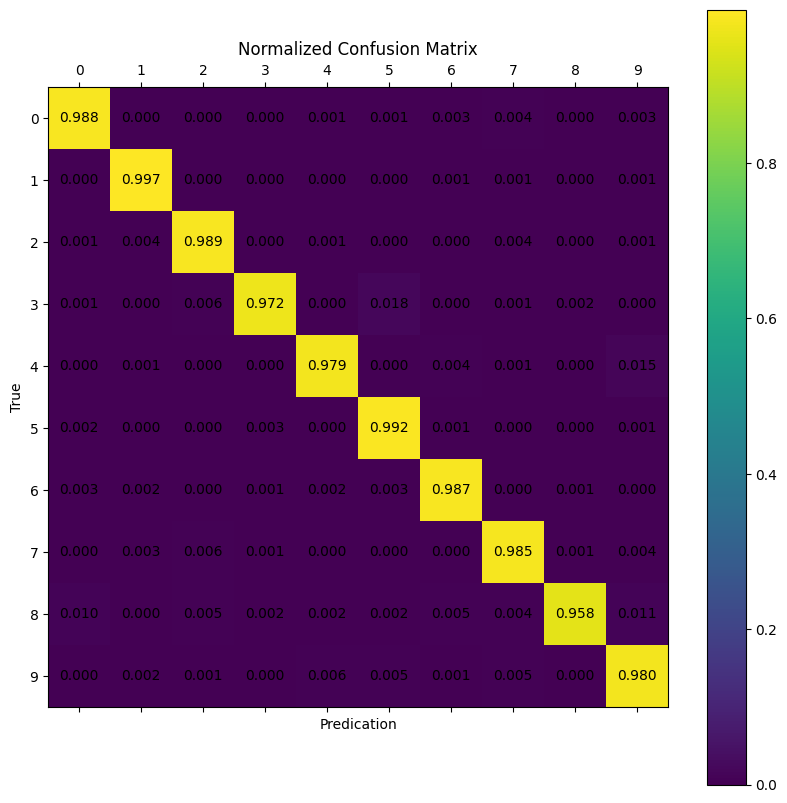

In [56]:
#normalized confusion matrix

plt.figure(figsize = (10,10))
cm = confusion_matrix(y.numpy(), y_pred.numpy(), normalize="true")
plt.matshow(cm, fignum=1)

for (i,j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
    
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predication")
plt.ylabel("True")

classes = test_dataset.enc.classes_.tolist()
plt.gca().set_xticklabels(classes)
plt.gca().set_yticklabels(classes)

plt.title("Normalized Confusion Matrix")
plt.colorbar()
plt.show()


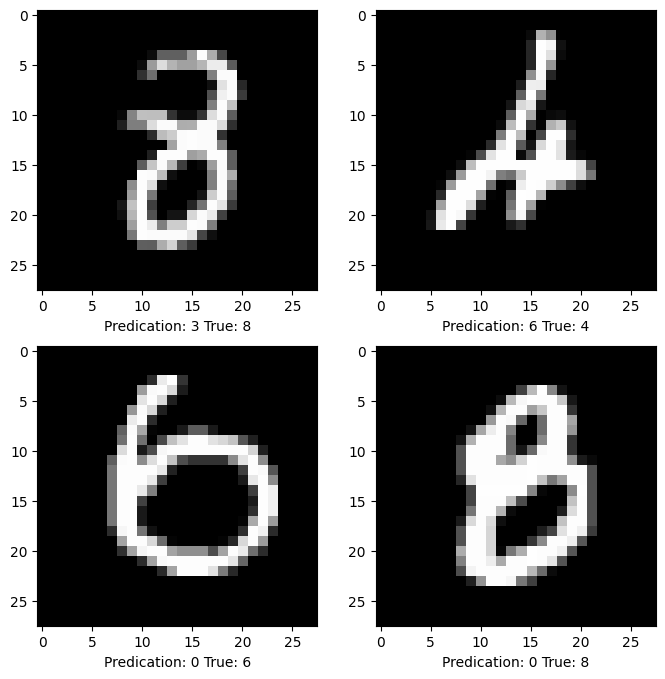

In [59]:
#false positives
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes = axes.ravel()

it = iter(test_loader)
x, y = next(it)

outputs = model(x)
_, y_pred = torch.max(outputs, 1)
classes = test_dataset.enc.classes_.tolist()
false_idx = np.where(y.numpy() != y_pred.numpy())

for i, j in enumerate(false_idx[0][:4], 0):
    output = model(x[j].reshape(1, 1, 28, 28))
    _, y_pred = torch.max(output, 1)
    axes[i].imshow(x[j].reshape(28, 28), cmap = 'gray')
    axes[i].set_xlabel("Predication: {} True: {}".format(classes[y_pred.item()], classes[y[j]]))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

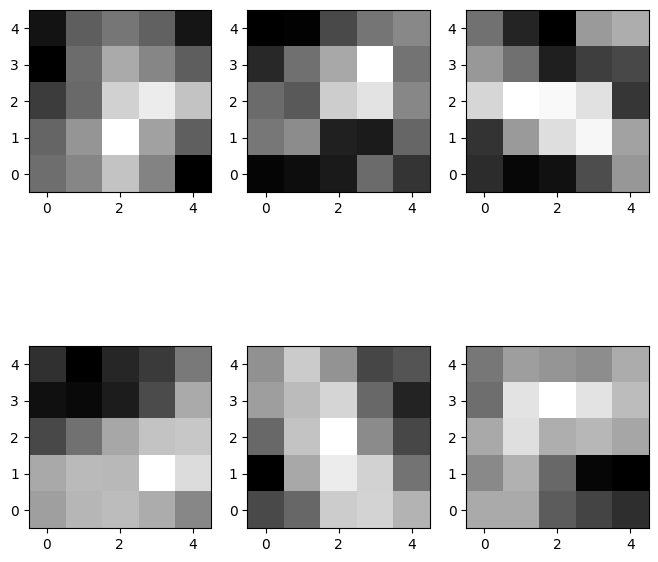

In [62]:
#Kernel visualization
fig, axes = plt.subplots(2, 3, figsize=(8,8))
axes = axes.ravel()

for i, kernel in enumerate(model.conv1.weight, 0):
    axes[i].imshow(kernel.detach().reshape(5, 5), cmap = 'gray', origin='lower')
                   
plt.show